In [ ]:
%load_ext rpy2.ipython

# Style Guides and Linters

## The Tidyverse Style Guide
A style guide is a set of rules that embed consistency into your code. One such set of rules are contained in the [Tidyverse Style Guide](https://style.tidyverse.org/). These rules are essentially just *opinions*, since there are no hard-and-fast rules to the way you write your code, and there are many different style guides available. We have chosen to discuss the Tidyverse style guide because of its popularity. We could not feasibly cover every point in the Tidyverse Style Guide within this session, but we hope to emphasise some of the main points and tie them together with an example so you can bring the ideas back to your own code after the session. Complete details can be found in the [style guide](https://style.tidyverse.org/). 

Being conscious of consistency in your code can go a long way in improving the ease of collaboration and the impact of your code on your research. We will approach consistency from three levels of increasing granularity:

1.    File name
2.    Structure implemented within a file
3.    Syntax used within file

## File Naming and Structure
The first simple yet important aspect of an R file is its name. When naming your file you should:

1.    Give your file a descriptive name 
2.    Give your file the extension .R (not .r)
3.    Avoid whitespace. 

Suppose we have a script that fits a linear model; calling this file `some file.r` violates all of the above. Naming the file `fit-linear-model.R` will make it much easier to locate.

If you have a sequence of files that are intended to be run in a specific order, number them to indicate this. For example, `01-exploratory-analysis.R`, `02-fit-models.R`, `03-plot-results.R`.

If you have to import a set of libraries, do so at the beginning of the file using `library()` as opposed to loading them sporadically throughout the file.

Often, using comments such as `# ---------- ... ------------` can be useful to increase readability and indicate the purpose of each sub-section in the script. For example, one way of organising a small script could be as follows:

In [ ]:
%%R
# ---------- loading libraries ---------


# ---------- defining functions --------


# ---------- performing analysis -------


# ---------- saving and plotting results ------------

Note, in R using the [project structure](https://r4ds.hadley.nz/workflow-scripts.html#projects) or even creating your own [R package](https://r-pkgs.org/) can be useful for more involved analyses, though we do not cover those topics here.

## File Syntax
### Variables and Functions
Naming conventions extend from the file itself to the variables, functions and classes in your code; these should be consistent.

Variable and function names should only contain lowercase letters, numbers and underscores. In particular, names should not contain white space. If a variable name contains multiple words, separate them using underscores. For example:

In [ ]:
%%R
# bad
StringOne <-  "hello world!"

# bad
stringone <-  "hello world!"

# good
string_one <-  "hello world!"

Also, *never* use the names of built in functions or variables e.g. `T`, `mean`, `pi`, `sum` etc.

#### Assignment
Use ` <- ` for assignment instead of ` = `.

In [ ]:
%%R
# bad
greeting = "hello"

# good
greeting <- "hello" 

#### Semi-colons
Don't use them 

In [ ]:
%%R
# bad
x <-  1; y <- 2; z <- 3;

# good
x <- 1
y <- 2
z <- 3

### Horizontal Spacing
Commas: space as you would in normal English i.e. a space after, and only after, the comma.

In [ ]:
%%R
# bad
ones_matrix <- matrix( 1, 10 ,10 )
ones_matrix[ , 1]

# good
twos_matrix <- matrix(2, 10, 10)
twos_matrix[, 1]

 [1] 2 2 2 2 2 2 2 2 2 2


Parentheses: avoid spaces before and after parentheses in function calls, but do include them before and after conditional statements.

In [ ]:
%%R
word_print_bad <- function (word) {
  if(word){
    print( word ) 
  }
}

word_print_good <- function(word) {
  if (word) {
    print(word) 
  }
}


### Vertical Spacing 
Excessive whitespace should be avoided, but no whitespace at all is equally as bad. The style guide suggests the following:

-   Avoid empty lines at the start or end of functions.
-   Only use a single empty line when needed to separate functions or pipes.
-   It often makes sense to put an empty line before a comment block, to help visually connect the explanation with the code that it applies to.

### Functions
#### Setting up a function quickly
Functions are an integral part of R; the skeleton code for a function in R is:

In [ ]:
%%R
name <- function(variables) {
  
}

In RStudio, you can set this up quickly by typing `fun` and hitting the tab key twice on your keyboard. 

#### Returning
You only need to write return in a function for an early return. R returns the last evaluated expression by default.

In [ ]:
%%R
# bad
celcius_to_fahrenheit_bad <- function(temperature){
  return(temperature*(9/5) + 32)
}

# good
celcius_to_fahrenheit_good <- function(temperature) {
  temperature*(9/5) + 32  
}

celcius_to_fahrenheit_bad(-20)
celcius_to_fahrenheit_good(-20)

[1] -4


Example of early return:

In [ ]:
%%R
random_function <- function(){
  x <- runif(1)
  if (x < 0.25){
    message("** The number was less than 0.25")
    return(x)
  } else {
    message("** The number was greater than 0.25")
    random_function()
  }
}

xx <- random_function()
xx

[1] 0.1492978


** The number was greater than 0.25
** The number was less than 0.25


#### Function Arguments
In R, a function's arguments are typically either:
-   Data being computed on (we can omit the names here)
-   Computation details (we typically use the full names of these)

In [ ]:
%%R
# Bad
mean(x = 1:10, , FALSE)
mean(, TRUE, x = c(1:10, NA))

# Good
mean(1:10, na.rm = TRUE)

[1] 5.5


Use the full names of the arguments you specify. In R you can use partial matching by specifying a unique prefix of a function argument, but this should be avoided as it can create unnecessary ambiguity.

In [ ]:
%%R
# bad
mean(c(1:10, NA), n = TRUE)
mean(c(1:10, NA), na = TRUE)
mean(c(1:10, NA), na. = TRUE)
mean(c(1:10, NA), na.r = TRUE)

# good
mean(c(1:10, NA), na.rm = TRUE)

[1] 5.5


### Exercise

Consider the following two versions of R code that perform the same task. Discuss in groups what is good about each implementation and what could be improved.

[1] "The mean is: 20.090625"


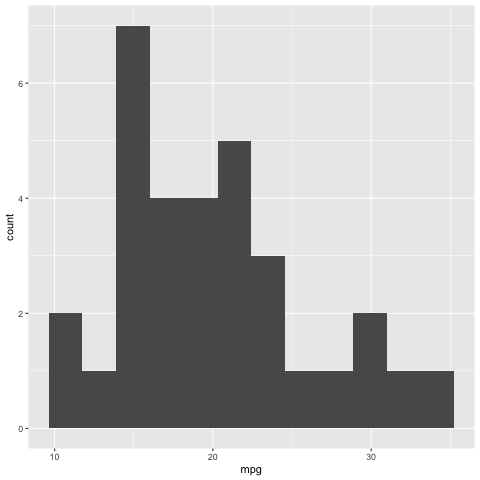

In [ ]:
%%R
# file name: my code.r

# this script does stuff
library(ggplot2);library(dplyr)

dat = mtcars; DATA2=dat %>% select(mpg);result=mean(DATA2$mpg)
PrintMean <- function(d){
  m <- mean(d$mpg); print(paste("The mean is:",m)); return(m)
}

ShowHist <- function(d,bars=10){
  ggplot(data = d,aes(x= mpg))+geom_histogram(bins=bars)
}

x = PrintMean(d=dat)
ShowHist(dat, ba=12)

[1] "The mean MPG is: 20.090625"


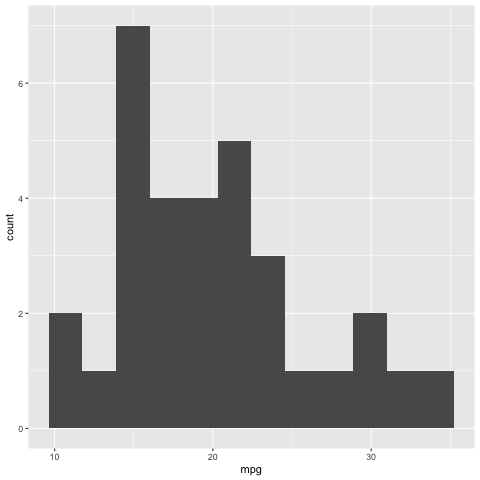

In [ ]:
%%R
# file name: calculate_mpg_summary.R

# ----------------------------------------
# Load required libraries
# ----------------------------------------
library(ggplot2)
library(dplyr)

# ----------------------------------------
# Prepare data
# ----------------------------------------
mtcars_data <- mtcars
mpg_data <- mtcars_data %>% select(mpg)

# ----------------------------------------
# Function to calculate mean MPG
# ----------------------------------------
print_mean_mpg <- function(data) {
  mean_value <- mean(data$mpg)
  print(paste("The mean MPG is:", mean_value))
  mean_value
}

# ----------------------------------------
# Function to show histogram of MPG
# ----------------------------------------
show_histogram <- function(data, bins = 10) {
  ggplot(data = data, aes(x = mpg)) +
    geom_histogram(bins = bins)
}

# ----------------------------------------
# Run analysis
# ----------------------------------------
mean_mpg <- print_mean_mpg(mtcars_data)
show_histogram(data = mtcars_data, bins = 12)



## The Styler and lintr packages
The `styler` and `lintr` packages are two useful packages for formatting your code according to the Tidyverse style guide. You can install them from CRAN in the usual way:
```{r eval=FALSE, include=TRUE}
install.packages("styler")
install.packages("lintr")
```

### Exercise
Paste the file `my code.r` from the example above into a new `R` file. Peruse the documentation of the `styler` package and experiment with the `style_file` function. How does it work on the `my code.r`example?

Do the same with the `lintr` package, using the `lint` function. How does it work with the `my code.r`example?